In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving Algerian_forest_fires_dataset_UPDATE.csv to Algerian_forest_fires_dataset_UPDATE.csv


In [ ]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
#df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df=df[~df.FWI.eq("FWI")]
df = df.dropna()
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
df1=df
df1=df1.iloc[:,3:11]
df1
print(df1.columns)
#df1=df1[~df1.FWI.eq("FWI")]


Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'], dtype='object')


In [ ]:
df1.describe()
print(df1.dtypes)

Rain       float64
FFMC       float64
DMC        float64
DC         float64
ISI        float64
BUI        float64
FWI        float64
Classes     object
dtype: object


### Some variables show strong correlation
### 0.74, 0.68, etc. This means we can consider dimension reduction.

In [ ]:
df_cor = df1.iloc[:,:].corr()
df_cor

<ipython-input-6-a439e8aac4f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = df1.iloc[:,:].corr()


,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Rain,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


<Axes: >

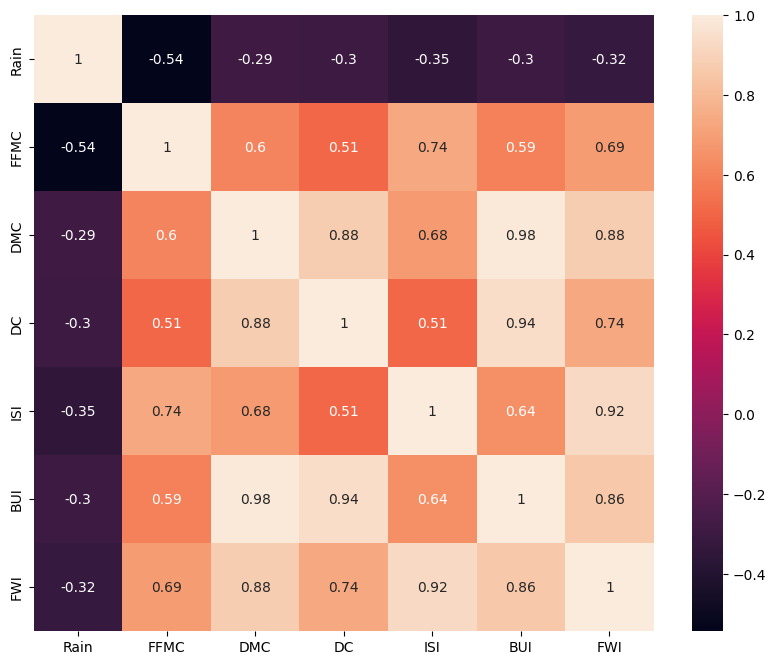

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 8))
sns.heatmap(df_cor, annot=True)

### PCA

In [ ]:
#Import the built-in dataset (Wine recognition) for this problem
import sklearn
from sklearn.decomposition import PCA

In [ ]:
#object dtype to float
x=['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
dfx=df1[x]
trans=dfx.T

cov_mat = np.cov(trans, rowvar=False) 
cov_mat

array([[573.51333333, 558.325     , 385.60333333, ..., 396.115     ,
        689.46166667, 579.125     ],
       [558.325     , 543.8247619 , 377.34809524, ..., 385.76952381,
        671.01071429, 563.56547619],
       [385.60333333, 377.34809524, 282.47809524, ..., 266.49952381,
        462.65904762, 388.40047619],
       ...,
       [396.115     , 385.76952381, 266.49952381, ..., 274.64571429,
        478.11309524, 402.86428571],
       [689.46166667, 671.01071429, 462.65904762, ..., 478.11309524,
        833.59285714, 703.18190476],
       [579.125     , 563.56547619, 388.40047619, ..., 402.86428571,
        703.18190476, 595.06571429]])

### Before Normalize, PC2 captures 98% of the data. 
### However, this can mean that some variables in greater range affect the Variance more.



In [ ]:
from sklearn.decomposition import PCA
pca_ = PCA(n_components = 4).fit(cov_mat)

#print('Components:\n', pca_normal.components_)

cum_explained_variance_pca = np.cumsum(pca_.explained_variance_ratio_)

X_pca = pca_.transform(cov_mat) # Apply dimensionality reduction to X.

In [ ]:
print('Explained variance ratio:\n', pca_.explained_variance_ratio_)
print('Cumulative explained variance without Normalization:\n', cum_explained_variance_pca)
print('Transformed data shape:', X_pca.shape)

Explained variance ratio:
 [9.40023020e-01 5.97643528e-02 1.80404354e-04 3.19425761e-05]
Cumulative explained variance without Normalization:
 [0.94002302 0.99978737 0.99996778 0.99999972]
Transformed data shape: (243, 4)


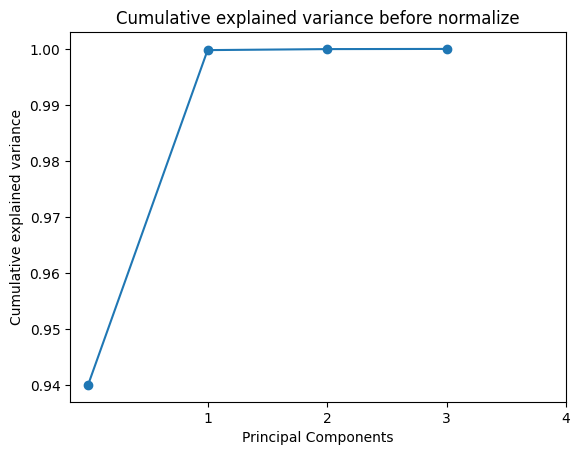

In [ ]:
plt.plot(range(0,len(cum_explained_variance_pca)), cum_explained_variance_pca, '-o')
plt.title('Cumulative explained variance before normalize')
plt.xticks(range(1,len(cum_explained_variance_pca)+1))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance');
plt.show()

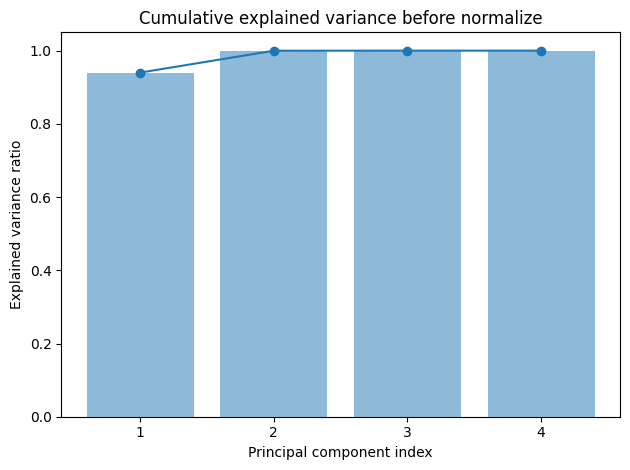

In [ ]:
# # Scale the dataset; This is very important before you apply PCA 
# from sklearn.preprocessing 
cum_sum_exp = np.cumsum(cum_explained_variance_pca) 

plt.bar(range(1,len(cum_explained_variance_pca)+1), cum_explained_variance_pca, alpha=0.5, align='center') 
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance') 
plt.plot(range(1,len(cum_explained_variance_pca)+1), cum_explained_variance_pca, '-o')

plt.xticks(range(1,len(cum_explained_variance_pca)+1))

plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal component index') 
plt.title('Cumulative explained variance before normalize')
#plt.legend(loc='best') 
plt.tight_layout() 

plt.show()

### After Normalize, PC1, PC2 captures 93.5% of the data
### If we choose up to PC2, then Transformed data shape would be (243, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
#standardized
cov_mat_std = StandardScaler().fit_transform(cov_mat)

from sklearn.decomposition import PCA
pca_normal = PCA(n_components = 4).fit(cov_mat_std)

#print('Components:\n', pca_normal.components_)

cum_explained_variance_normal_pca = np.cumsum(pca_normal.explained_variance_ratio_)

X_pca_normal = pca_normal.transform(cov_mat_std) # Apply dimensionality reduction to X.

In [ ]:
print('Explained variance ratio:\n', pca_normal.explained_variance_ratio_)
print('Cumulative explained variance with Normalization:\n', cum_explained_variance_normal_pca)
print('Transformed data shape:', X_pca_normal.shape)

Explained variance ratio:
 [7.08399582e-01 2.90841245e-01 6.26087172e-04 1.32506379e-04]
Cumulative explained variance with Normalization:
 [0.70839958 0.99924083 0.99986691 0.99999942]
Transformed data shape: (243, 4)


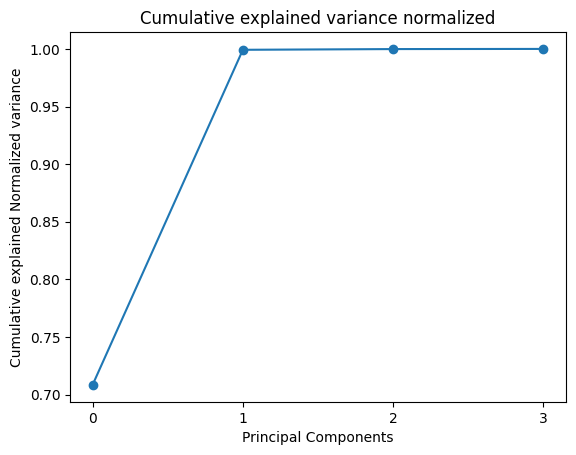

In [ ]:
plt.plot(range(0,len(cum_explained_variance_normal_pca)), cum_explained_variance_normal_pca, '-o')
plt.title('Cumulative explained variance normalized')
plt.xticks(range(0,len(cum_explained_variance_normal_pca)))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained Normalized variance');
plt.show()

### Same graph but with the bar

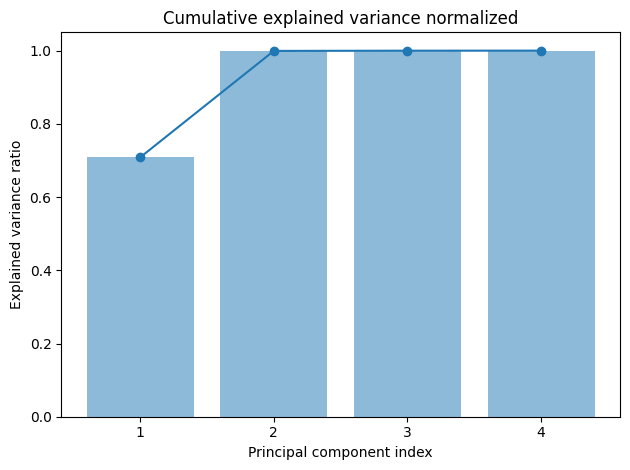

In [ ]:
# # Scale the dataset; This is very important before you apply PCA 
# from sklearn.preprocessing 
cum_sum_exp = np.cumsum(cum_explained_variance_normal_pca) 

plt.bar(range(1,len(cum_explained_variance_normal_pca)+1), cum_explained_variance_normal_pca, alpha=0.5, align='center') 
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance') 
plt.plot(range(1,len(cum_explained_variance_normal_pca)+1), cum_explained_variance_normal_pca, '-o')

plt.xticks(range(1,len(cum_explained_variance_normal_pca)+1))

plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal component index') 
plt.title('Cumulative explained variance normalized')
#plt.legend(loc='best') 
plt.tight_layout() 

plt.show()

In [ ]:
list(df['Classes'])

['not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'not fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',

In [ ]:
classes = df['Classes']
classes

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Length: 243, dtype: object

In [ ]:
cdict = {'fire ': 0,'fire': 0, 'fire   ':0, ' not fire':1, 'not fire   ':1, 'not fire    ': 1, 'not fire':1, 'not fire ':1, 'not fire     ':1}
classes = df['Classes'].replace({'fire ': 0,'fire': 0, 'fire   ':0, ' not fire':1, 'not fire   ':1, 'not fire    ': 1, 'not fire':1, 'not fire ':1, 'not fire     ':1})
list_class = list(classes)

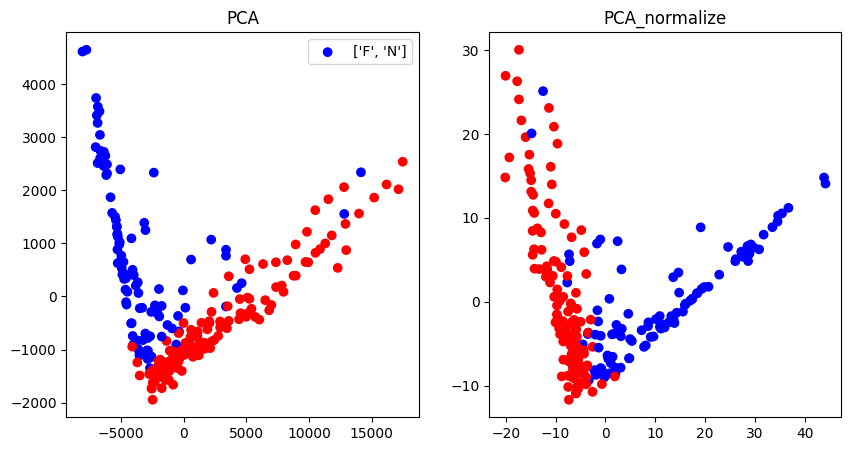

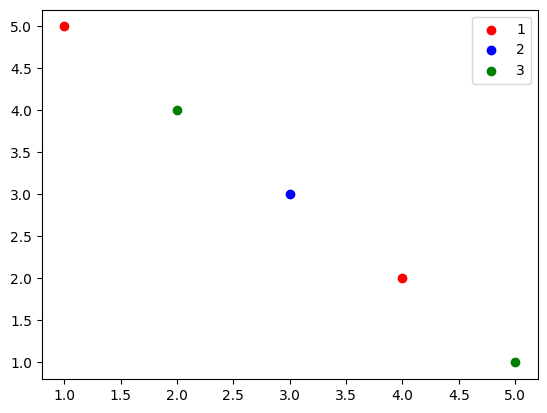

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c = list_class, cmap = ListedColormap(['r','b']), label=['F','N'])
axs[0].set_title("PCA")
axs[0].legend(loc="upper right")

axs[1].scatter(X_pca_normal[:, 0], X_pca_normal[:, 1], c = list_class, cmap = ListedColormap(['r','b']))
axs[1].set_title("PCA_normalize");

scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g)
ax.legend()
plt.show()

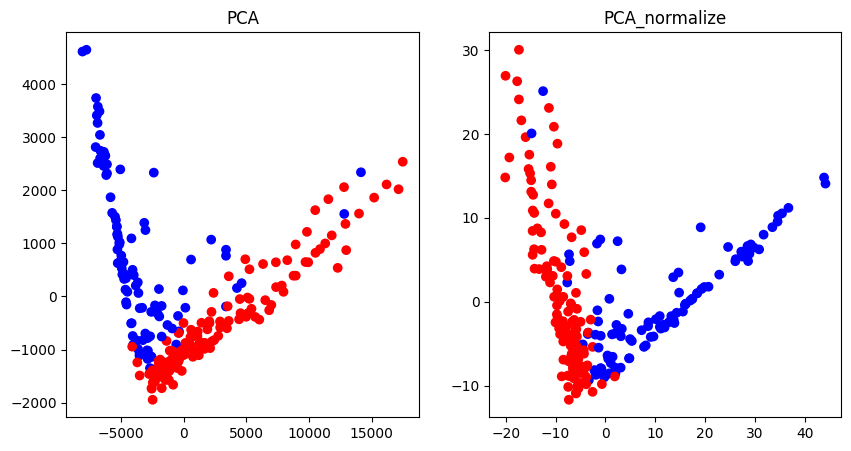

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c = list_class, cmap = ListedColormap(['r','b']))
axs[0].set_title("PCA")
#axs[0].legend(loc="upper right")

axs[1].scatter(X_pca_normal[:, 0], X_pca_normal[:, 1], c = list_class, cmap = ListedColormap(['r','b']))
axs[1].set_title("PCA_normalize");
#axs[1].legend(loc="upper right")

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
df1.head()

,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


## Model Selection

In [4]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans # Importing KMeans Cluster library from SK Learn
dforig=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv').dropna()

dforig['Classes'] = dforig['Classes'].replace({'fire ': 0,'fire': 0, 'fire   ':0, ' not fire':1, 'not fire   ':1, 'not fire    ': 1, 'not fire':1, 'not fire ':1, 'not fire     ':1})
print(dforig['Classes'].values)
dfattr=dforig.iloc[:,0:10]
dfclass=dforig['Classes']


[1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1]


In [ ]:
# Defining number of clusters as 4 for all the datasets

km_dataset1 = KMeans(n_clusters=2)
var_km_labels1 = km_dataset1.fit_predict(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km_df = pd.DataFrame(var_km_labels1, columns=['Kmeans Cluster'])
km_df
print(var_km_labels1)

[1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0]


In [ ]:
li = zip(var_km_labels1, list_class)
print(list(li))

[(1, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (1, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (0, 1),

In [ ]:
from scipy.cluster.hierarchy import dendrogram
# Importing Agglomerative Clustering library from SK Learn Module
from sklearn.cluster import AgglomerativeClustering

# Generating clusters for Dataset 1
var_hierarchical_cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
var_hc_labels1 = var_hierarchical_cluster1.fit_predict(dfattr)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
hrc_df = pd.DataFrame(var_hc_labels1, columns=['Hierachial'])
hrc_df
#hrc_df.insert(value = list_class, column='Original')
li_hc = zip(var_hc_labels1, list_class)
print(list(li_hc))

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1),

In [ ]:
Actual_predicted = pd.DataFrame({'Actual': list_class, 'Predicted': var_hc_labels1})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Hierarchial Clustering']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Hierarchial Clustering']).agg({'Hierarchial Clustering':['count']})
Actual_predicted_group_df.reset_index()

Hierarchial Clustering      
                         count
0                Matched   155
1              Unmatched    88

In [ ]:
X, y=X_pca_normal[:, 0:2], list_class
print(X_pca_normal[:, 0:2])

[[ 11.1471715   -3.20485569]
 [ 12.74130074  -2.45173653]
 [ 30.86665341   6.24504199]
 [ 43.89484818  14.82314869]
 [ 10.92235639  -1.70955777]
 [ -4.33108011  -8.56236894]
 [ -7.54567319  -8.81898686]
 [ -6.86509916  -6.50261346]
 [ 19.13851526   8.87839502]
 [  0.80943009   0.34598733]
 [ -7.8157522   -2.96401324]
 [ -7.4678681   -1.17220463]
 [ 24.63653334   6.53504865]
 [ 17.41303784   0.30808259]
 [ 26.08647594   4.83310686]
 [ 36.75238443  11.20123602]
 [ 35.46139379  10.54482554]
 [ 18.40551704   0.99907715]
 [ -1.78189263  -8.55274004]
 [ 13.62528661   2.9226353 ]
 [ -4.2771138   -6.19866917]
 [ -3.51798216  -3.85778934]
 [ -5.82443783  -3.29229871]
 [ -8.76573048  -3.30689086]
 [ -9.56845392  -1.88735747]
 [ -9.15418968   0.08842397]
 [ -9.65334968   1.47563808]
 [-10.54557575   3.08487561]
 [ -7.14217499   4.84438199]
 [-11.74446056   3.56329695]
 [ 16.15064818  -0.24687087]
 [ 19.85324002   1.75822788]
 [ 13.2364064   -1.71789463]
 [ -2.18244673  -8.18329885]
 [ -6.61115793

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터들 변환(스케일링)
scaler = StandardScaler() # 생성자 호출 - 변환기 객체 생성
scaler.fit(X_train, y_train) # 학습 데이터의 평균과 표준 편차를 데이터 변환할 때 이용하기 위해서
X_train_transformed = scaler.transform(X_train) # 학습 데이터 세트 변환
X_test_transformed = scaler.transform(X_test) # 테스트 데이터 세트 변환

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier(n_neighbors=2)
k_neigh.fit(X_train_transformed, y_train)
y_pred_knn = k_neigh.predict(X_test_transformed)
y_predict_knn_probs=k_neigh.predict_proba(X_test_transformed)

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

[[28  1]
 [ 2 18]]


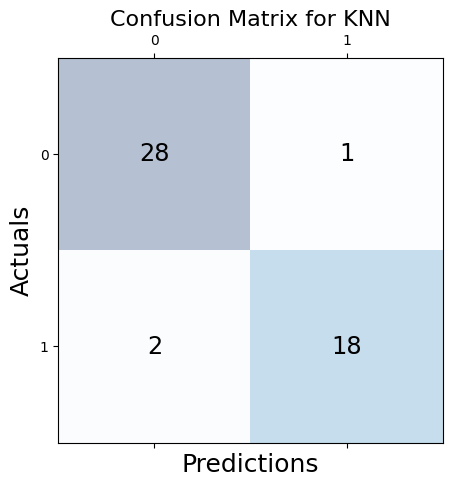

In [ ]:
from sklearn.metrics import roc_curve
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for KNN', fontsize=16)
plt.show()



[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]


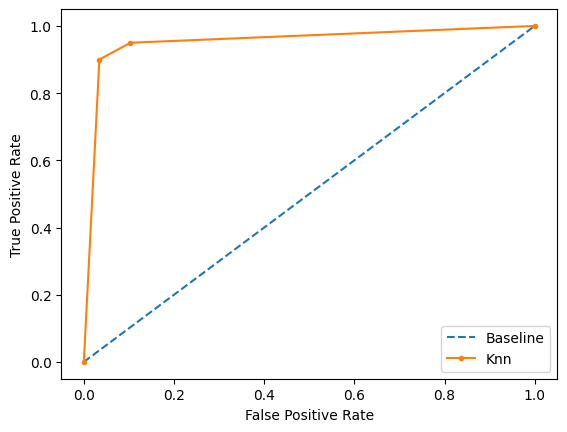

In [ ]:
y_predict_knn_probsfire=[classes[1] for classes in y_predict_knn_probs]
print(y_predict_knn_probsfire)
probspace=[0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, probspace)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict_knn_probsfire)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Knn')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_knn)))
print("MCC score is {}".format(matthews_corrcoef(y_test, y_pred_knn)))
print("F1 score is {}".format(f1_score(y_test, y_pred_knn)))

Accuracy score is 0.9387755102040817
MCC score is 0.873076487447726
F1 score is 0.9230769230769231


### Gaussian Naive Bayse

In [31]:
from sklearn.naive_bayes import GaussianNB
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(dfattr, dfclass, test_size=0.2, random_state=42)
# 머신 러닝 모델 선택 - Naive Bayes
gnb = GaussianNB() # Gaussian Naive Bayes 모델 선택 - 연속형 자료
gnb.fit(X_train_gnb, y_train_gnb) # 모델 학습
y_pred_gnb = gnb.predict(X_test_gnb) # 예측
y_predict_gnb_probs=gnb.predict_proba(X_test_gnb)

In [32]:
print(confusion_matrix(y_test_gnb, y_pred_gnb))
print(len(y_test_gnb),len(y_pred_gnb))

[[25  2]
 [ 2 20]]
49 49


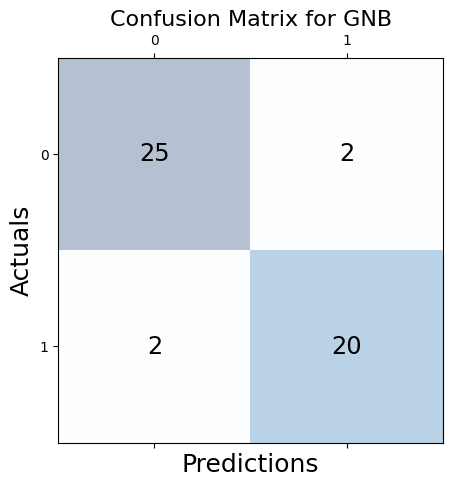

In [33]:
conf_matrix = confusion_matrix(y_true=y_test_gnb, y_pred=y_pred_gnb)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for GNB', fontsize=16)
plt.show()

In [34]:
print(classification_report(y_test_gnb, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.91      0.91      0.91        22

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



In [36]:
print("Accuracy score is {}".format(accuracy_score(y_test_gnb, y_pred_gnb)))
print("MCC score is {}".format(matthews_corrcoef(y_test_gnb, y_pred_gnb)))
print("F1 score is {}".format(f1_score(y_test_gnb, y_pred_gnb)))

Accuracy score is 0.9183673469387755
MCC score is 0.835016835016835
F1 score is 0.9090909090909091


49


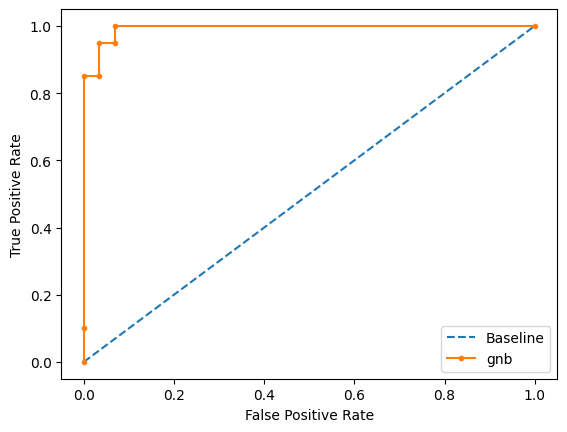

In [ ]:
y_predict_gnb_probsfire=[classes[1] for classes in y_predict_gnb_probs]
print(len(y_predict_gnb_probs))
probspace=[0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, probspace)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict_gnb_probsfire)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='gnb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Tree map

In [ ]:
from sklearn import tree
X, y=dfattr, list_class
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

[Text(0.375, 0.9166666666666666, 'x[4] <= 80.15\ngini = 0.492\nsamples = 243\nvalue = [137, 106]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 102\nvalue = [0, 102]'),
 Text(0.5, 0.75, 'x[7] <= 2.65\ngini = 0.055\nsamples = 141\nvalue = [137, 4]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 77.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.5833333333333334, 'x[7] <= 3.05\ngini = 0.014\nsamples = 137\nvalue = [136, 1]'),
 Text(0.625, 0.4166666666666667, 'x[7] <= 2.9\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'x[6] <= 31.65\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.4166666666

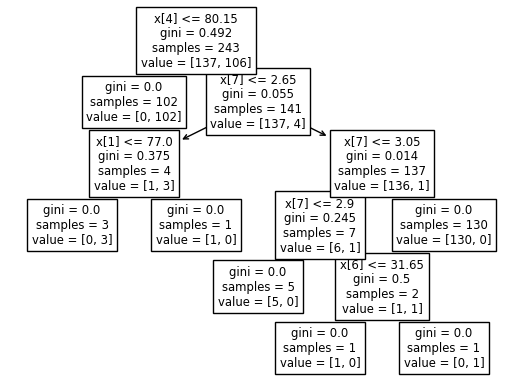

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()
regr_1.fit(X_train_transformed, y_train)
y_pred_tree1 = regr_1.predict(X_test_transformed)


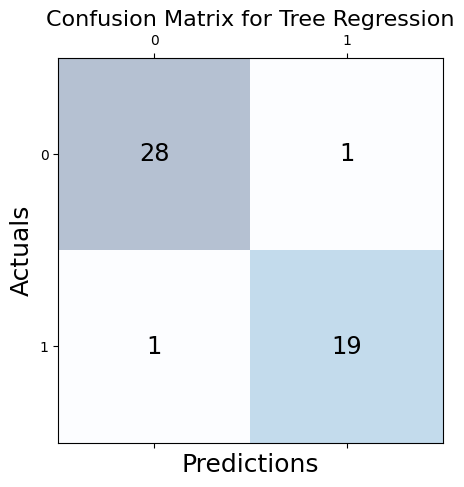

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_tree1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Tree Regression', fontsize=16)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_tree1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.95      0.95      0.95        20

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_tree1)))
print("MCC score is {}".format(matthews_corrcoef(y_test, y_pred_tree1)))
print("F1 score is {}".format(f1_score(y_test, y_pred_tree1)))

Accuracy score is 0.9591836734693877
MCC score is 0.9155172413793103
F1 score is 0.9500000000000001


In [ ]:
# Importing all the libraries needed for external validation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(dfattr, y)

LinearRegression()

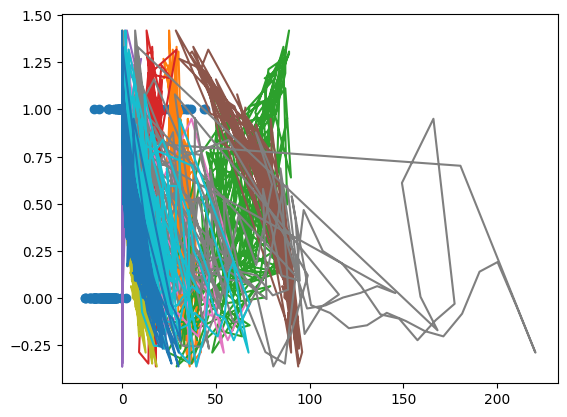

In [ ]:
plt.plot(X_pca_normal[:, 0], list_class, 'o')
plt.plot(dfattr,line_fitter.predict(dfattr))
plt.show()

### logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,random_state=32,test_size=.2)

In [ ]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [ ]:
X_train_after_Standardisation,X_test_after_Standardisation=Feature_Scaling(X_train, X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression=LogisticRegression()
logistic_regression.fit(X_train_after_Standardisation,y_train)
y_pred_logi_rgre = logistic_regression.predict(X_test_after_Standardisation)
y_pred_logi_probs=logistic_regression.predict_proba(X_test_after_Standardisation)

In [ ]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

print("Training Score:",logistic_regression.score(X_train_after_Standardisation, y_train))
print("Test Score:",logistic_regression.score(X_test_after_Standardisation, y_pred_logi_rgre))

Intercept is : [-0.37065586]
Coefficient is : [[-2.95480818  2.78358764 -1.31283205 -1.42931202]]
Training Score: 0.9742268041237113
Test Score: 1.0


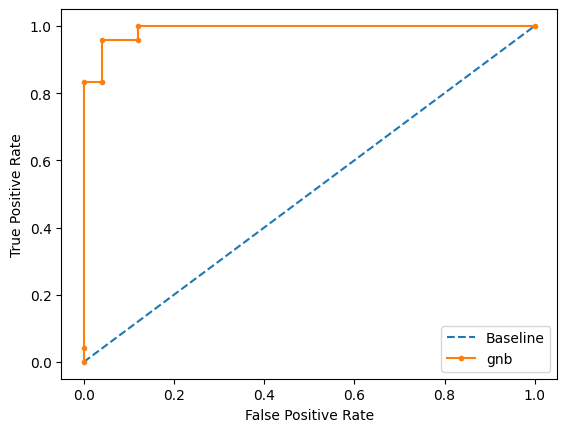

In [ ]:
y_predict_logi_probsfire=[classes[1] for classes in y_pred_logi_probs]
ns_fpr, ns_tpr, _ = roc_curve(y_test, probspace)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict_logi_probsfire)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='gnb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_logi_rgre)))
print("MCC score is {}".format(matthews_corrcoef(y_test, y_pred_logi_rgre)))
print("F1 score is {}".format(f1_score(y_test, y_pred_logi_rgre)))

Accuracy score is 0.9183673469387755
MCC score is 0.839206575741442
F1 score is 0.9130434782608695


In [ ]:
Actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logi_rgre})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Classes']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Classes']).agg({'Classes':['count']})
Actual_predicted_group_df.reset_index()

Classes      
             count
0    Matched    79
1  Unmatched     2

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

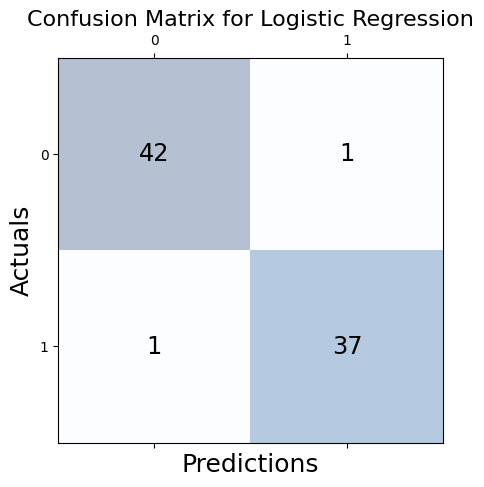

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_logi_rgre)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.show()

### LDA

In [5]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(dfattr, dfclass, test_size=0.2, random_state=42)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
probspace2=[0 for _ in range(len(y_test_lda))]
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)
y_pred_lda = lda.predict(X_test_lda)
y_pred_lda_probs=lda.predict_proba(X_test_lda)

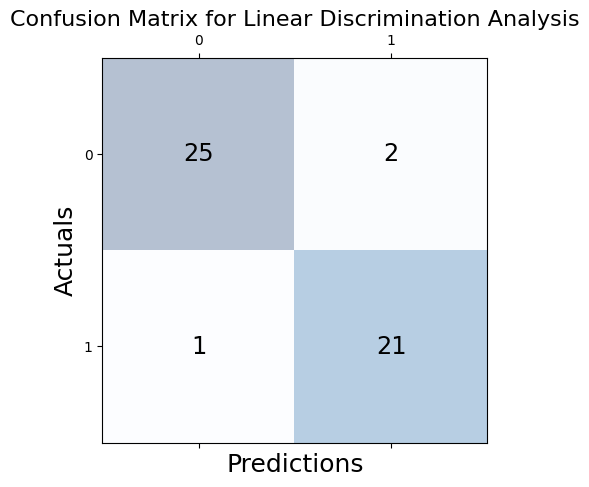

In [16]:
conf_matrix = confusion_matrix(y_test_lda,y_pred_lda)

#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Linear Discrimination Analysis', fontsize=16)
plt.show()

In [17]:
print("Accuracy score is {}".format(accuracy_score(y_test_lda, y_pred_lda)))
print("MCC score is {}".format(matthews_corrcoef(y_test_lda, y_pred_lda)))
print("F1 score is {}".format(f1_score(y_test_lda, y_pred_lda)))

Accuracy score is 0.9387755102040817
MCC score is 0.8775217193155135
F1 score is 0.9333333333333332


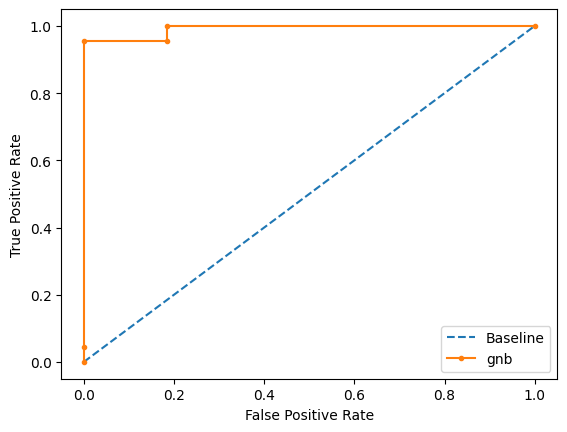

In [18]:
from sklearn.metrics import roc_curve
y_predict_lda_probsfire=[classes[1] for classes in y_pred_lda_probs]
ns_fpr, ns_tpr, _ = roc_curve(y_test_lda, probspace2)
lr_fpr, lr_tpr, _ = roc_curve(y_test_lda, y_predict_lda_probsfire)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='gnb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()